In [1]:
import numpy as np

In [5]:
def convolution_2d(input_matrix, kernel):
    """
    Perform a 2D convolution operation on the input_matrix using the given kernel.
    
    Parameters:
        input_matrix (numpy.ndarray): The input 2D matrix.
        kernel (numpy.ndarray): The 2D kernel matrix.
    
    Returns:
        numpy.ndarray: The resulting matrix after convolution.
    """
    input_rows, input_cols = input_matrix.shape
    kernel_rows, kernel_cols = kernel.shape
    
    # Calculate the dimensions of the output matrix
    output_rows = input_rows - kernel_rows + 1
    output_cols = input_cols - kernel_cols + 1

    #Initialize the output matrix
    output_matrix = np.zeros((output_rows, output_cols))
    
    # Perform the convolution
    #for i in range(output_rows):
        #for j in range(output_cols):
            # Extract the region of the input matrix corresponding to the kernel size
            #region = input_matrix[i:i + kernel_rows, j:j + kernel_cols]
            # Perform element-wise multiplication and sum the result
            #output_matrix[i, j] = np.sum(region * kernel)
    
    #return output_matrix


    for i in range(output_rows):
        for j in range(output_cols):
            summation = 0
            for m in range(kernel_rows):
                for n in range(kernel_cols):
                    summation += input_matrix[i+m, j+n] * kernel[m,n]
                output_matrix[i, j] = summation    
    return output_matrix

# Example usage
if __name__ == "__main__":
    input_matrix = np.array([
        [1, 2, 3, 0],
        [4, 5, 6, 1],
        [7, 8, 9, 2],
        [0, 1, 2, 3]
    ])
    
    kernel = np.array([
        [1, 0],
        [0, -1]
    ])
    
    result = convolution_2d(input_matrix, kernel)
    print("Input Matrix:")
    print(input_matrix)
    print("\nKernel:")
    print(kernel)
    print("\nResulting Matrix after Convolution:")
    print(result)

Input Matrix:
[[1 2 3 0]
 [4 5 6 1]
 [7 8 9 2]
 [0 1 2 3]]

Kernel:
[[ 1  0]
 [ 0 -1]]

Resulting Matrix after Convolution:
[[-4. -4.  2.]
 [-4. -4.  4.]
 [ 6.  6.  6.]]


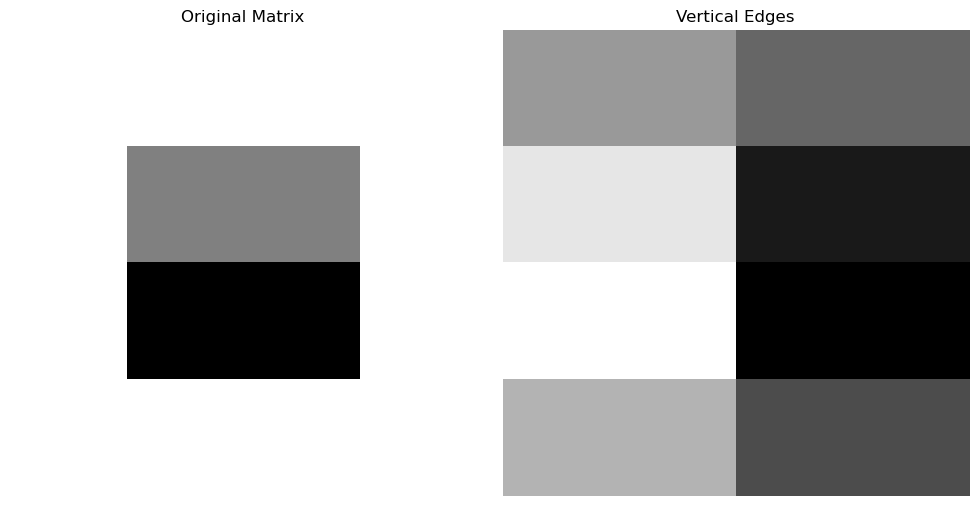

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Example input matrix (grayscale image)
input_matrix = np.array([
    [100, 100, 100, 100],
    [100, 50, 50, 100],
    [100, 0, 0, 100],
    [100, 100, 100, 100]
], dtype=np.float32)

# Sobel vertical edge detection kernel
sobel_vertical_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Apply convolution
vertical_edges = convolve(input_matrix, sobel_vertical_kernel)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original matrix
axes[0].imshow(input_matrix, cmap='gray', interpolation='none')
axes[0].set_title("Original Matrix")
axes[0].axis('off')

# Vertical edges detected
axes[1].imshow(vertical_edges, cmap='gray', interpolation='none')
axes[1].set_title("Vertical Edges")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [9]:
#Determinant Matrix

In [17]:
A=np.array([[1,3,-2],[2,7,-3],[3,8,-5]])
D=np.linalg.det(A)
print(D)

2.0000000000000004


In [19]:
#Minor and cofactor

In [21]:
def minor(matrix, i, j):
    # Remove the i-th row and j-th column
    submatrix = np.delete(np.delete(matrix, i, axis=0), j, axis=1)
    return np.linalg.det(submatrix)

def cofactor(matrix, i, j):
    # Cofactor is the minor multiplied by (-1)^(i+j)
    return (-1) ** (i + j) * minor(matrix, i, j)

# Example matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Calculate minor and cofactor for element A[0, 0] (1st row, 1st column)
minor_11 = minor(A, 0, 0)
cofactor_11 = cofactor(A, 0, 0)

print(f"Minor of A[0,0]: {minor_11}")
print(f"Cofactor of A[0,0]: {cofactor_11}")

Minor of A[0,0]: -2.9999999999999996
Cofactor of A[0,0]: -2.9999999999999996


In [23]:
def minor(matrix, i, j):
    """
    Calculate the minor of the element at position (i, j).
    """
    submatrix = np.delete(np.delete(matrix, i, axis=0), j, axis=1)
    return np.linalg.det(submatrix)

def cofactor(matrix):
    """
    Calculate the cofactor matrix.
    """
    n = matrix.shape[0]
    cofactor_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            cofactor_matrix[i, j] = (-1) ** (i + j) * minor(matrix, i, j)
    return cofactor_matrix

def adjoint(matrix):
    """
    Calculate the adjoint matrix (transpose of the cofactor matrix).
    """
    cofactor_matrix = cofactor(matrix)
    return cofactor_matrix.T

# Example matrix
A = np.array([[1, 2, 1],
              [2, -1, 0],
              [0, 3, 1]])

# Calculate minor, cofactor, and adjoint matrices
minor_matrix = np.array([[minor(A, i, j) for j in range(A.shape[1])] for i in range(A.shape[0])])
cofactor_matrix = cofactor(A)
adjoint_matrix = adjoint(A)

print("Original Matrix A:")
print(A)

print("\nMinor Matrix:")
print(minor_matrix)

print("\nCofactor Matrix:")
print(cofactor_matrix)

print("\nAdjoint Matrix:")
print(adjoint_matrix)

Original Matrix A:
[[ 1  2  1]
 [ 2 -1  0]
 [ 0  3  1]]

Minor Matrix:
[[-1.  2.  6.]
 [-1.  1.  3.]
 [ 1. -2. -5.]]

Cofactor Matrix:
[[-1. -2.  6.]
 [ 1.  1. -3.]
 [ 1.  2. -5.]]

Adjoint Matrix:
[[-1.  1.  1.]
 [-2.  1.  2.]
 [ 6. -3. -5.]]


In [25]:
# Define the matrix
A = np.array([[1, 2, 1],
              [2, -1, 0],
              [0, 3, 1]])

# Compute the inverse
try:
    A_inv = np.linalg.inv(A)
    print("Inverse of the matrix A:")
    print(A_inv)
except np.linalg.LinAlgError:
    print("Matrix A is singular and cannot be inverted.")

Inverse of the matrix A:
[[-1.  1.  1.]
 [-2.  1.  2.]
 [ 6. -3. -5.]]


In [27]:
# Define the matrix
A = np.array([[1, 2, 1],
              [2, -1, 0],
              [0, 3, 1]])

# Compute the inverse of the matrix
try:
    A_inv = np.linalg.inv(A)
    print("Inverse of the matrix A:")
    print(A_inv)
except np.linalg.LinAlgError:
    print("Matrix A is singular and cannot be inverted.")

Inverse of the matrix A:
[[-1.  1.  1.]
 [-2.  1.  2.]
 [ 6. -3. -5.]]
